In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import cleaned data
df = pd.read_csv('Data/AirbnbCleaned.csv')

C:\Users\jerry\AppData\Local\Temp\ipykernel_25972\140830257.py:2: DtypeWarning: Columns (13,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/AirbnbCleaned.csv')


In [4]:
# drop unnecessary columns
df.drop(['index','host id', 'id', 'country', 'country code', 'Unnamed: 0', 'service fee', 'totprice', 'lat', 'long', 'Bronx'], axis=1, inplace=True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

license                           101633
house_rules                        54423
last review                        15745
availability 365                     406
minimum nights                       389
calculated host listings count       316
review rate number                   297
host_identity_verified               257
NAME                                 229
number of reviews                    182
reviews per month                    142
neighbourhood                         14
price                                  0
house_rules_length                     0
textfeat1                              0
Shared room                            0
Private room                           0
Hotel room                             0
Entire home/apt                        0
instant_bookable_dummy                 0
cancellation_strict                    0
cancellation_moderate                  0
cancellation_flexible                  0
Queens                                 0
Staten Island   

In [23]:
df.drop_duplicates(inplace=True)

In [7]:
df = df.dropna(subset=['instant_bookable', 'host name','Construction year'])
df = df.dropna(subset=['price','NAME','host_identity_verified'])
df = df.dropna(subset=['neighbourhood group','neighbourhood'])


In [8]:
df.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,...,cancellation_flexible,cancellation_moderate,cancellation_strict,instant_bookable_dummy,Entire home/apt,Hotel room,Private room,Shared room,textfeat1,textfeat2
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966,...,0,0,1,0,0,0,1,0,-0.441672,-0.026500
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142,...,0,1,0,0,1,0,0,0,-0.415310,0.011865
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204,...,0,1,0,0,1,0,0,0,-0.475012,0.011521
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,True,flexible,Entire home/apt,2013.0,577,...,1,0,0,1,1,0,0,0,0.577121,-0.674267
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,False,moderate,Private room,2009.0,1060,...,0,1,0,0,0,0,1,0,-0.413307,0.026470


In [9]:
df.dtypes

index                               int64
NAME                               object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                               int64
service fee                         int64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
license                            object
totprice                          

In [9]:
df_sub = df.select_dtypes(include=['float64', 'int64']).drop([], axis=1)

In [10]:
# drop na values
df_sub_drop = df_sub.dropna(subset=['Construction year', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365'])

In [11]:
# Check if there are any NaN values in df_sub
df_sub_drop.isna().any()

Construction year                 False
price                             False
minimum nights                    False
number of reviews                 False
reviews per month                 False
review rate number                False
calculated host listings count    False
availability 365                  False
Brooklyn                          False
Manhattan                         False
Queens                            False
Staten Island                     False
house_rules_length                False
cancellation_flexible             False
cancellation_moderate             False
cancellation_strict               False
instant_bookable_dummy            False
Entire home/apt                   False
Hotel room                        False
Private room                      False
Shared room                       False
textfeat1                         False
textfeat2                         False
dtype: bool

In [112]:
# fill in NaN if needed
df_sub["minimum nights"].fillna(df_sub["minimum nights"].mean(), inplace=True)
df_sub["number of reviews"].fillna(df_sub["number of reviews"].mean(), inplace=True)
df_sub["reviews per month"].fillna(df_sub["reviews per month"].mean(), inplace=True)    
df_sub["review rate number"].fillna(df_sub["review rate number"].median(), inplace=True)
df_sub["calculated host listings count"].fillna(df_sub["calculated host listings count"].mean(), inplace=True)
df_sub["availability 365"].fillna(df_sub["availability 365"].mean(), inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
X = df_sub_drop.drop(['price'], axis=1)
y = df_sub_drop['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [13]:
X_train.shape, X_test.shape

((79780, 22), (19946, 22))

In [54]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
r_scaler = RobustScaler()
X_train = r_scaler.fit_transform(X_train)
X_test = r_scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression()

In [55]:
y_pred_linreg = linreg.predict(X_test)
results_linreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linreg}) 
results_linreg.head(10) 

,Actual,Predicted
97769,504,626.665917
75435,1035,618.587573
61085,962,636.334015
88276,136,610.915729
58727,421,624.901824
91077,130,620.467854
98837,354,615.683063
99815,194,621.274643
29151,218,627.050682
44415,1184,609.209128


In [16]:
pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])


,Coefficient
Construction year,-2.059131
minimum nights,-0.108037
number of reviews,0.733577
reviews per month,0.872441
review rate number,-3.897082
calculated host listings count,-0.013875
availability 365,-2.924148
Brooklyn,-4.464272
Manhattan,-8.931945
Queens,-1.436505


In [17]:
df_sub_drop['price'].mean()

625.4821210115717

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

cv_scores = []
for i in range(1, 21):
    pls = PLSRegression(n_components=i)
    scores = cross_val_score(pls, X_train, y_train, cv=5)
    cv_scores.append(np.mean(scores))

optimal = np.argmax(cv_scores) + 1
optimal

1

In [18]:
# decision tree
from sklearn.tree import DecisionTreeRegressor as DTR

tree = DTR(random_state=1)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})
results_tree.head(10)


,Actual,Predicted
97769,504,504.0
75435,1035,249.0
61085,962,208.0
88276,136,136.0
58727,421,585.0
91077,130,130.0
98837,354,354.0
99815,194,194.0
29151,218,218.0
44415,1184,192.0


In [20]:
# get root mean squared error for tree
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test, y_pred_tree) ** 0.5

366.8080316823611

In [21]:
# rmse for linear regression
MSE(y_test, y_pred_linreg) ** 0.5

331.4341810529007

In [22]:
MSE(y_test, y_pred_tree)

134548.13210668805

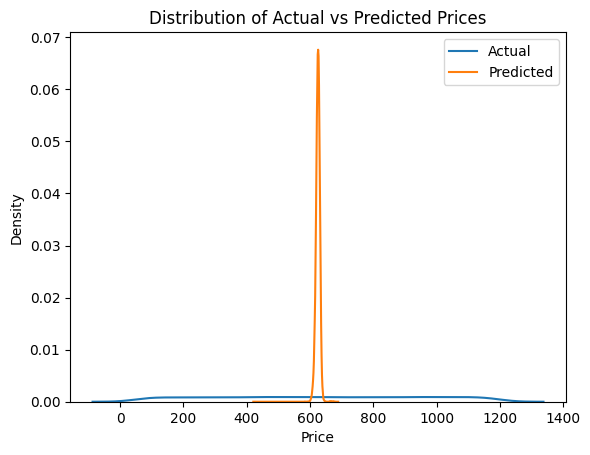

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the actual prices
sns.kdeplot(y_test, label='Actual')

# Plot the distribution of the predicted prices
sns.kdeplot(y_pred_linreg, label='Predicted')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Prices')
plt.legend()
plt.show()

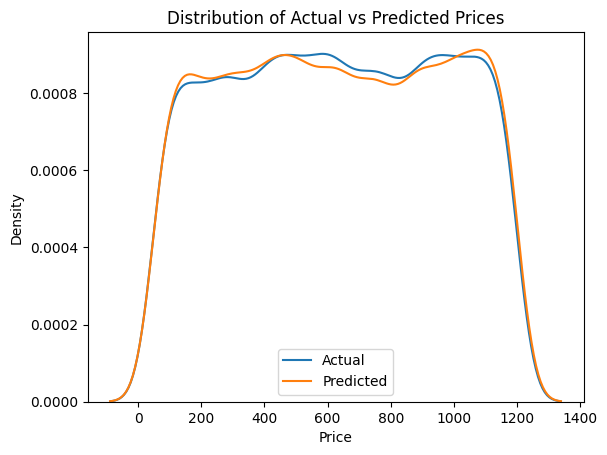

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the actual prices
sns.kdeplot(y_test, label='Actual')

# Plot the distribution of the predicted prices
sns.kdeplot(y_pred_tree, label='Predicted')

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Prices')
plt.legend()
plt.show()

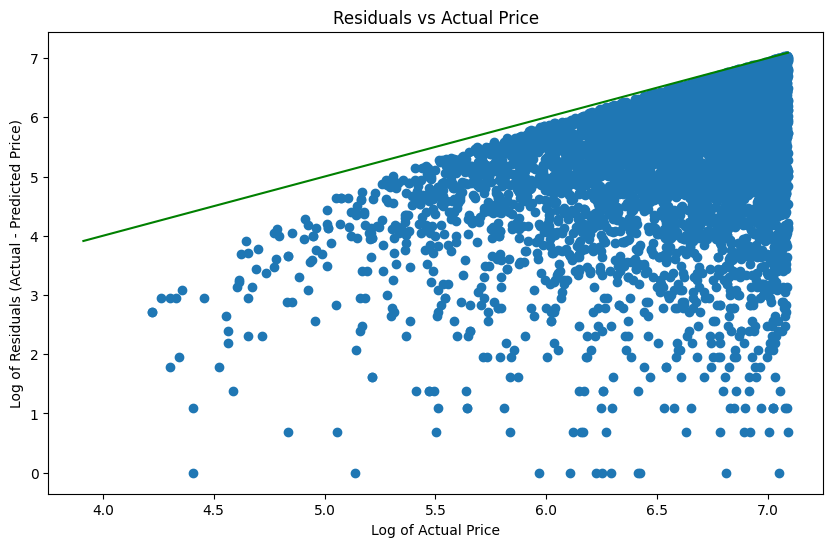

In [29]:
import numpy as np
import matplotlib.pyplot as plt

difference = y_test - y_pred_tree

# Calculate the log of y_test and difference
log_y_test = np.log(y_test)
log_difference = np.log(difference)

# Plot the difference
plt.figure(figsize=(10,6))
plt.scatter(log_y_test, log_difference)

# Draw a vertical line where x = y
min_val = min(log_y_test)
max_val = max(log_y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='g', linestyle='-')

plt.xlabel('Log of Actual Price')
plt.ylabel('Log of Residuals (Actual - Predicted Price)')
plt.title('Residuals vs Actual Price')
plt.show()

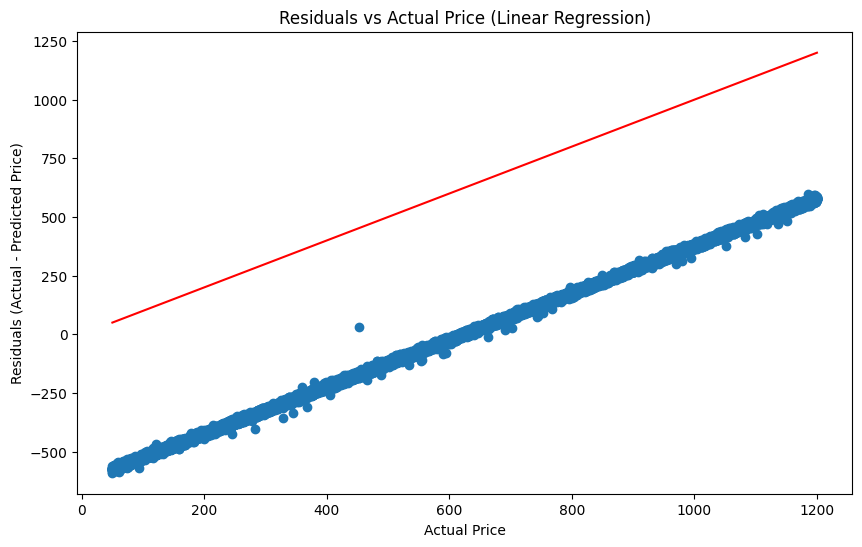

In [59]:
import matplotlib.pyplot as plt

# Calculate the difference between the actual and predicted prices
difference = y_test - y_pred_linreg

# Plot the difference
plt.figure(figsize=(10,6))
plt.scatter(y_test, difference)

# Draw a vertical line where x = y
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='-')

plt.xlabel('Actual Price')
plt.ylabel('Residuals (Actual - Predicted Price)')
plt.title('Residuals vs Actual Price (Linear Regression)')
plt.show()

In [95]:
lower_price = 40
higher_price = 1250
k = 0.01
def x_to_p(x):
    return lower_price + (higher_price - lower_price) * (1 / (1 + np.exp(-k * x)))

def p_to_x(p):
    return -np.log((higher_price - lower_price) / (p - lower_price)-1) / k

new_x = p_to_x(df_sub_drop['price'])

In [96]:
# new train test splits using modified y
X = df_sub_drop.drop(['price'], axis=1)
y = new_x
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=1)

In [97]:
# running new linreg
X_train_log = r_scaler.fit_transform(X_train_log)
X_test_log = r_scaler.transform(X_test_log)

linreg = LinearRegression()
linreg.fit(X_train_log, y_train_log)

y_pred_log_linreg = linreg.predict(X_test_log)
results_linreg = pd.DataFrame({'Actual': y_test_log, 'Predicted': y_pred_log_linreg}) 
results_linreg.head(10) 

,Actual,Predicted
97769,-47.484105,-12.211468
75435,153.210471,-15.816069
61085,116.358474,-7.686563
88276,-245.136423,-20.165274
58727,-77.742078,-13.482927
91077,-252.127429,-14.928767
98837,-104.854743,-16.836114
99815,-192.529086,-14.598603
29151,-175.747040,-11.135121
44415,285.263143,-21.231473


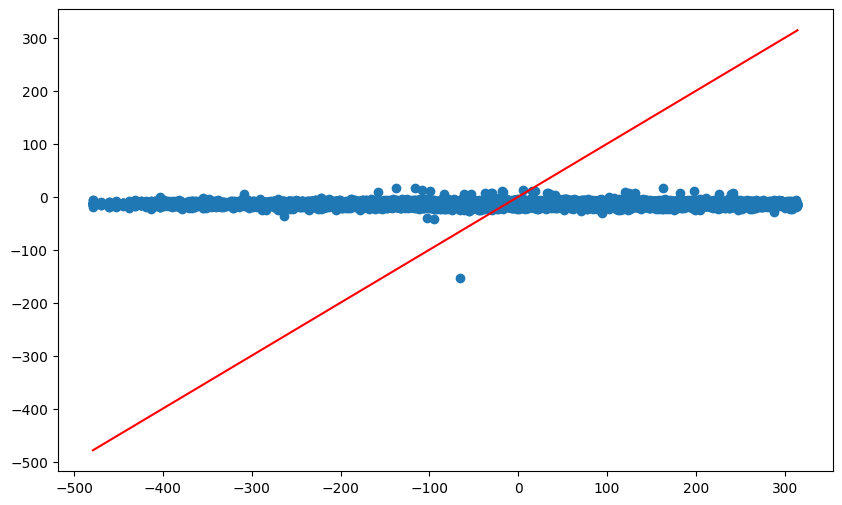

In [98]:
difference = y_test_log - y_pred_log_linreg

# Plot the difference
plt.figure(figsize=(10,6))
plt.scatter(y_test_log, y_pred_log_linreg)

# Draw a vertical line where x = y
min_val = min(y_test_log)
max_val = max(y_test_log)
plt.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='-')

plt.show()

In [63]:
# convert x back to p
new_p_test = x_to_p(y_test_log)
new_p_pred = x_to_p(y_pred_log_linreg)

In [65]:
max(y_pred_log_linreg)

0.16806976159901457

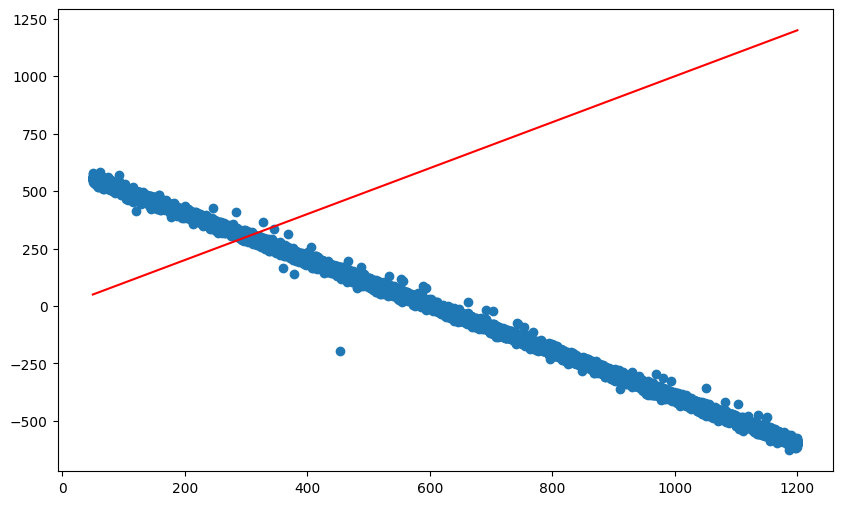

In [70]:
difference = new_p_pred - new_p_test
# Plot the difference
plt.figure(figsize=(10,6))
plt.scatter(new_p_test, difference)

# Draw a vertical line where x = y
min_val = min(new_p_test)
max_val = max(new_p_test)
plt.plot([min_val, max_val], [min_val, max_val], color='r', linestyle='-')

plt.show()

In [69]:
max(new_p_pred)

695.7217623750249